<a href="https://colab.research.google.com/github/torquerxf/DS_ybi/blob/main/Dimensionality_Reduction_Skeleton_Code.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

Skeleton Code

In [2]:
import requests
from bs4 import BeautifulSoup
import zipfile
import io
import pandas as pd
from sklearn.cluster import KMeans
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import LabelEncoder, StandardScaler
from sklearn.linear_model import LogisticRegression
from sklearn.pipeline import Pipeline
from sklearn.metrics import accuracy_score, classification_report
import numpy as np
import time

# Function to download and load dataset
def load_data():
    page_url = 'https://archive.ics.uci.edu/dataset/240/human+activity+recognition+using+smartphones'
    page_response = requests.get(page_url)
    if page_response.status_code == 200:
        soup = BeautifulSoup(page_response.content, 'html.parser')
        download_link = soup.select_one('a[href$=".zip"]')['href']
        full_download_url = 'https://archive.ics.uci.edu' + download_link
        response = requests.get(full_download_url)
        if response.status_code == 200:
            with zipfile.ZipFile(io.BytesIO(response.content)) as outer_zip:
                inner_zip_name = 'UCI HAR Dataset.zip'
                with outer_zip.open(inner_zip_name) as inner_zip_file:
                    with zipfile.ZipFile(io.BytesIO(inner_zip_file.read())) as inner_zip:
                        with inner_zip.open('UCI HAR Dataset/train/X_train.txt') as myfile:
                            df = pd.read_csv(myfile, delim_whitespace=True, header=None)
                        with inner_zip.open('UCI HAR Dataset/train/y_train.txt') as myfile_y:
                            y = pd.read_csv(myfile_y, delim_whitespace=True, header=None)
    else:
        raise Exception("Failed to download or parse the dataset.")
    return df, y

In [ ]:
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import LabelEncoder, StandardScaler
from sklearn.linear_model import LogisticRegression
from sklearn.pipeline import Pipeline
from sklearn.metrics import accuracy_score
from sklearn.cluster import KMeans
import numpy as np
import time

# Load dataset
df, y = load_data()

#TASK 1 - DO EDA and understand a little about the data.
#Only important thing is to know that it has a lot of features that don't make sense, just a
#bunch of readings from sensors.
#We think many of these features are redundant or irrelevant, and we want to find good features.



# Task 2: Encode class labels
# YOUR CODE HERE: Use LabelEncoder to encode class labels
label_encoder = LabelEncoder()
encoded_y = # YOUR CODE HERE



# Task 3: Scale the features using StandardScaler
# YOUR CODE HERE: Apply StandardScaler to df
scaler = StandardScaler()
df_scaled = # YOUR CODE HERE



# Task 4: Split the data into training and testing sets
# YOUR CODE HERE: Use train_test_split to split the data
X_train_full, X_test_full, y_train, y_test = # YOUR CODE HERE



# Define a Pipeline with Gaussian Naive Bayes and train it on the full dataset
start_time = time.time()
classifier_pipeline_full = Pipeline([
    ('classifier', GaussianNB())
])
classifier_pipeline_full.fit(X_train_full, y_train)
y_pred_full = classifier_pipeline_full.predict(X_test_full)
end_time = time.time()
full_features_time = end_time - start_time
accuracy_full = accuracy_score(y_test, y_pred_full)



# Task 5: Perform K-Means clustering for dimensionality reduction
# Define the number of clusters and fit K-Means on the transposed scaled dataset
n_clusters = 50
kmeans = KMeans(n_clusters=n_clusters, random_state=42, n_init=10)
#YOUR CODE HERE - fit K-means on the transposed scaled dataset



selected_features_indices = [np.random.choice(np.where(kmeans.labels_ == i)[0]) for i in range(n_clusters)]
selected_features = df_scaled[:, selected_features_indices]

# Task 6: Split the data with reduced features for training and testing
# YOUR CODE HERE: Use train_test_split on the selected features
X_train_reduced, X_test_reduced = # YOUR CODE HERE


# Task 7: Implement and train a NB model on the reduced feature set
# YOUR CODE HERE: Define a Pipeline with Gaussian Naive Bayes and train it on the reduced dataset




# Print accuracy and training time for both models
print("Baseline Model (All Features):")
print("Accuracy:", accuracy_full)
print("Training Time:", full_features_time, "seconds")
print("Number of Features:", X_train_full.shape[1])

print("\nModel with Reduced Features (K-Means):")
print("Accuracy:", accuracy_reduced)
print("Training Time:", reduced_features_time, "seconds")
print("Number of Features:", n_clusters)

#TASK 8:
#1. Report improvement in wall clock training time needed and accuracy.
#2. Repeat the experiment with different n_clusters and make accuracy and time taken plots.
#3. Explain the results and your interpretation


In [3]:
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import LabelEncoder, StandardScaler
from sklearn.linear_model import LogisticRegression
from sklearn.pipeline import Pipeline
from sklearn.metrics import accuracy_score
from sklearn.cluster import KMeans
import numpy as np
import time

# Load dataset
df, y = load_data()

<ipython-input-2-836ccc4d8ebc>:30: FutureWarning: The 'delim_whitespace' keyword in pd.read_csv is deprecated and will be removed in a future version. Use ``sep='\s+'`` instead
  df = pd.read_csv(myfile, delim_whitespace=True, header=None)
<ipython-input-2-836ccc4d8ebc>:32: FutureWarning: The 'delim_whitespace' keyword in pd.read_csv is deprecated and will be removed in a future version. Use ``sep='\s+'`` instead
  y = pd.read_csv(myfile_y, delim_whitespace=True, header=None)


EDA

In [6]:
df.head()

,0,1,2,3,4,5,6,7,8,9,...,551,552,553,554,555,556,557,558,559,560
0,0.288585,-0.020294,-0.132905,-0.995279,-0.983111,-0.913526,-0.995112,-0.983185,-0.923527,-0.934724,...,-0.074323,-0.298676,-0.710304,-0.112754,0.030400,-0.464761,-0.018446,-0.841247,0.179941,-0.058627
1,0.278419,-0.016411,-0.123520,-0.998245,-0.975300,-0.960322,-0.998807,-0.974914,-0.957686,-0.943068,...,0.158075,-0.595051,-0.861499,0.053477,-0.007435,-0.732626,0.703511,-0.844788,0.180289,-0.054317
2,0.279653,-0.019467,-0.113462,-0.995380,-0.967187,-0.978944,-0.996520,-0.963668,-0.977469,-0.938692,...,0.414503,-0.390748,-0.760104,-0.118559,0.177899,0.100699,0.808529,-0.848933,0.180637,-0.049118
3,0.279174,-0.026201,-0.123283,-0.996091,-0.983403,-0.990675,-0.997099,-0.982750,-0.989302,-0.938692,...,0.404573,-0.117290,-0.482845,-0.036788,-0.012892,0.640011,-0.485366,-0.848649,0.181935,-0.047663
4,0.276629,-0.016570,-0.115362,-0.998139,-0.980817,-0.990482,-0.998321,-0.979672,-0.990441,-0.942469,...,0.087753,-0.351471,-0.699205,0.123320,0.122542,0.693578,-0.615971,-0.847865,0.185151,-0.043892


In [4]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7352 entries, 0 to 7351
Columns: 561 entries, 0 to 560
dtypes: float64(561)
memory usage: 31.5 MB


In [5]:
df.describe()

,0,1,2,3,4,5,6,7,8,9,...,551,552,553,554,555,556,557,558,559,560
count,7352.000000,7352.000000,7352.000000,7352.000000,7352.000000,7352.000000,7352.000000,7352.000000,7352.000000,7352.000000,...,7352.000000,7352.000000,7352.000000,7352.000000,7352.000000,7352.000000,7352.000000,7352.000000,7352.000000,7352.000000
mean,0.274488,-0.017695,-0.109141,-0.605438,-0.510938,-0.604754,-0.630512,-0.526907,-0.606150,-0.468604,...,0.125293,-0.307009,-0.625294,0.008684,0.002186,0.008726,-0.005981,-0.489547,0.058593,-0.056515
std,0.070261,0.040811,0.056635,0.448734,0.502645,0.418687,0.424073,0.485942,0.414122,0.544547,...,0.250994,0.321011,0.307584,0.336787,0.448306,0.608303,0.477975,0.511807,0.297480,0.279122
min,-1.000000,-1.000000,-1.000000,-1.000000,-0.999873,-1.000000,-1.000000,-1.000000,-1.000000,-1.000000,...,-1.000000,-0.995357,-0.999765,-0.976580,-1.000000,-1.000000,-1.000000,-1.000000,-1.000000,-1.000000
25%,0.262975,-0.024863,-0.120993,-0.992754,-0.978129,-0.980233,-0.993591,-0.978162,-0.980251,-0.936219,...,-0.023692,-0.542602,-0.845573,-0.121527,-0.289549,-0.482273,-0.376341,-0.812065,-0.017885,-0.143414
50%,0.277193,-0.017219,-0.108676,-0.946196,-0.851897,-0.859365,-0.950709,-0.857328,-0.857143,-0.881637,...,0.134000,-0.343685,-0.711692,0.009509,0.008943,0.008735,-0.000368,-0.709417,0.182071,0.003181
75%,0.288461,-0.010783,-0.097794,-0.242813,-0.034231,-0.262415,-0.292680,-0.066701,-0.265671,-0.017129,...,0.289096,-0.126979,-0.503878,0.150865,0.292861,0.506187,0.359368,-0.509079,0.248353,0.107659
max,1.000000,1.000000,1.000000,1.000000,0.916238,1.000000,1.000000,0.967664,1.000000,1.000000,...,0.946700,0.989538,0.956845,1.000000,1.000000,0.998702,0.996078,1.000000,0.478157,1.000000


In [8]:
print(df.isnull().sum().sum())

0


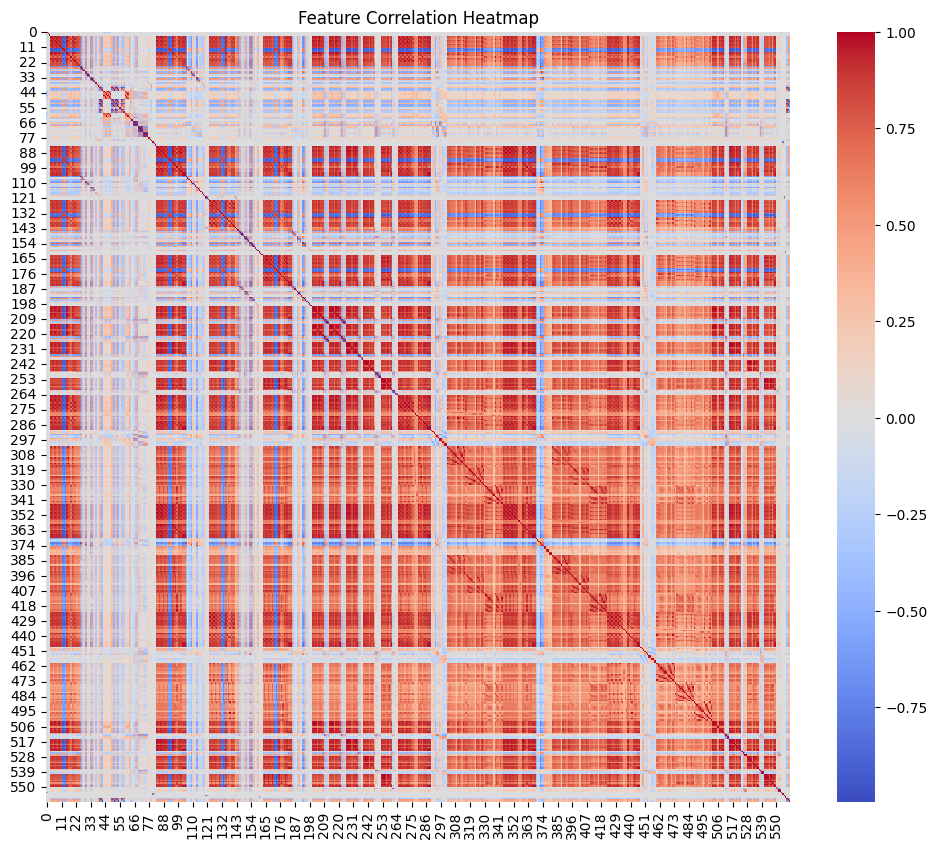

In [10]:
import seaborn as sns
import matplotlib.pyplot as plt

corr_matrix = df.corr()
plt.figure(figsize=(12, 10))
sns.heatmap(corr_matrix, cmap='coolwarm', annot=False, fmt='.2f')
plt.title("Feature Correlation Heatmap")
plt.show()

Encode class labels

In [11]:
labelencoder = LabelEncoder()
encoded_y = labelencoder.fit_transform(y)

/usr/local/lib/python3.10/dist-packages/sklearn/preprocessing/_label.py:114: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


Scale the features

In [14]:
# used standardization
scaler = StandardScaler()
df_scaled = scaler.fit_transform(df)
df_scaled

array([[ 0.20064157, -0.0636826 , -0.41962845, ..., -0.68721921,
         0.40794614, -0.00756789],
       [ 0.05594788,  0.03148567, -0.25390836, ..., -0.694138  ,
         0.40911698,  0.00787517],
       [ 0.07351535, -0.04341648, -0.07629468, ..., -0.702239  ,
         0.4102883 ,  0.02650234],
       ...,
       [-0.01566765,  0.0167814 ,  1.13222107, ..., -0.56584847,
         0.64059683,  0.34870928],
       [ 0.21586648, -0.02812252, -0.86770988, ..., -0.57766781,
         0.63147758,  0.29327564],
       [ 1.09620157,  0.12919873, -1.67268082, ..., -0.57392691,
         0.63274259,  0.33396081]])

Split the dataset into training and test

In [26]:
X_train_full, X_test_full, y_train, y_test = train_test_split(df_scaled, encoded_y, test_size=0.2, random_state=42)

Baseline Model - Gaussian Naive Bayes with All Features

In [27]:
# measure the accuracy and time for this model

import time
from sklearn.naive_bayes import GaussianNB
from sklearn.pipeline import Pipeline
from sklearn.metrics import accuracy_score

start_time = time.time()
classifier_pipeline_full = Pipeline([
    ('classifier', GaussianNB())
])
classifier_pipeline_full.fit(X_train_full, y_train)
y_pred_full = classifier_pipeline_full.predict(X_test_full)
end_time = time.time()
full_features_time = end_time - start_time
accuracy_full = accuracy_score(y_test, y_pred_full)

print("Baseline Model (All Features):")
print("Accuracy:", accuracy_full)
print("Training Time:", full_features_time, "seconds")

Baseline Model (All Features):
Accuracy: 0.7314751869476547
Training Time: 0.10373973846435547 seconds


K-Means Clustering for Dimensionality Reduction

In [28]:
# now, we perform k means clustering for dimensionality reduction
from sklearn.cluster import KMeans
import numpy as np

# K-Means for dimensionality reduction
n_clusters = 50
kmeans = KMeans(n_clusters=n_clusters, random_state=42, n_init=10)
kmeans.fit(df_scaled.T)  # Transpose to treat features as data points

KMeans(n_clusters=50, n_init=10, random_state=42)

Selecting the representative features from the clusters

In [29]:
selected_features_indices = [np.random.choice(np.where(kmeans.labels_ == i)[0]) for i in range(n_clusters)]
selected_features = df_scaled[:, selected_features_indices]


splitting the data with reduced features

In [30]:
X_train_reduced, X_test_reduced = train_test_split(selected_features, test_size=0.2, random_state=42)

Train Gaussian Naive Bayes on Reduced Features

In [31]:
import time
from sklearn.naive_bayes import GaussianNB
from sklearn.pipeline import Pipeline
from sklearn.metrics import accuracy_score

start_time = time.time()
classifier_pipeline_reduced = Pipeline([
    ('classifier', GaussianNB())
])
classifier_pipeline_reduced.fit(X_train_reduced, y_train)
y_pred_reduced = classifier_pipeline_reduced.predict(X_test_reduced)
end_time = time.time()
reduced_features_time = end_time - start_time
accuracy_reduced = accuracy_score(y_test, y_pred_reduced)

print("Model with Reduced Features (K-Means):")
print("Accuracy:", accuracy_reduced)
print("Training Time:", reduced_features_time, "seconds")

Model with Reduced Features (K-Means):
Accuracy: 0.8198504418762746
Training Time: 0.011292457580566406 seconds


Comparing both results

In [32]:
print("Baseline Model (All Features):")
print("Accuracy:", accuracy_full)
print("Training Time:", full_features_time, "seconds")
print("Number of Features:", X_train_full.shape[1])

print("\nModel with Reduced Features (K-Means):")
print("Accuracy:", accuracy_reduced)
print("Training Time:", reduced_features_time, "seconds")
print("Number of Features:", n_clusters)

Baseline Model (All Features):
Accuracy: 0.7314751869476547
Training Time: 0.10373973846435547 seconds
Number of Features: 561

Model with Reduced Features (K-Means):
Accuracy: 0.8198504418762746
Training Time: 0.011292457580566406 seconds
Number of Features: 50
